In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
x_train = np.array([[4.7],[2.4],[7.5],[7.1],[4.3],[7.816],
                   [8.9],[5.2],[8.59],[2.1],[8],[10],[4.5],[6],[4]],
                  dtype = np.float32)

In [65]:
y_train = np.array([[2.6],[1.6],[3.09],[2.4],[2.4],[3.357],
                   [2.6],[1.96],[3.53],[1.76],[3.2],[3.5],[1.6],[2.5],[2.2]],
                  dtype = np.float32)

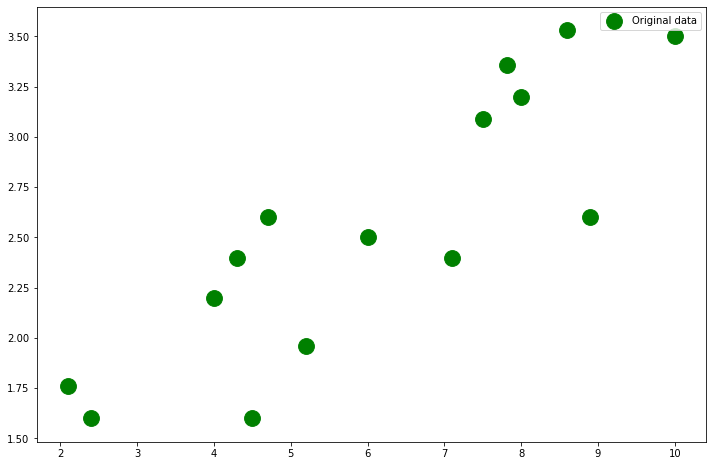

In [66]:
plt.figure(figsize = (12,8))

plt.scatter(x_train, y_train, label='Original data', s=250, c='g')
plt.legend()
plt.show()

In [69]:
import torch

#convert the input to tensors
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

print(X_train.requires_grad)
print(Y_train.requires_grad)

False
False


In [70]:
input_size =1 
hidden_size =1
output_size =1

In [89]:
w1 = torch.rand(input_size,
                hidden_size,
                 requires_grad = True)

w1.shape

torch.Size([1, 1])

In [90]:
w2 = torch.rand(hidden_size,
                output_size,
                 requires_grad = True)

w2.shape

torch.Size([1, 1])

In [130]:
#if the learning rate is more it indicates the step size is more in order to reach the minimum value or minization
lr= 0.0001

In [131]:
#train the data set for 10 iterations
for iter in range(1,3000):
    #forward pass is done here
    y_pred = X_train.mm(w1).mm(w2)
    #loss calculation is done here MSE loss for linear regression
    loss = (y_pred - Y_train).pow(2).sum()
    
    #for every 50 iteration result is taken
    if iter % 50 == 0:
        print(iter, loss.item())
     
    #backward loss to update the value of w and b
    loss.backward()
    
    #test the data set 
    with torch.no_grad():
        w1 -= lr * w1.grad
        w2 -= lr * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

50 4.089359283447266
100 4.089357376098633
150 4.089357376098633
200 4.089357376098633
250 4.089357376098633
300 4.089357376098633
350 4.089357376098633
400 4.089357376098633
450 4.089357376098633
500 4.089357376098633
550 4.089357376098633
600 4.089357376098633
650 4.089357376098633
700 4.089357376098633
750 4.089357376098633
800 4.089357376098633
850 4.089357376098633
900 4.089357376098633
950 4.089357376098633
1000 4.089357376098633
1050 4.089357376098633
1100 4.089357376098633
1150 4.089357376098633
1200 4.089357376098633
1250 4.089357376098633
1300 4.089357376098633
1350 4.089357376098633
1400 4.089357376098633
1450 4.089357376098633
1500 4.089357376098633
1550 4.089357376098633
1600 4.089357376098633
1650 4.089357376098633
1700 4.089357376098633
1750 4.089357376098633
1800 4.089357376098633
1850 4.089357376098633
1900 4.089357376098633
1950 4.089357376098633
2000 4.089357376098633
2050 4.089357376098633
2100 4.089357376098633
2150 4.089357376098633
2200 4.089357376098633
2250 4.0

In [132]:
print('w1',w1)
print('w2', w2)

w1 tensor([[0.6484]], requires_grad=True)
w2 tensor([[0.6117]], requires_grad=True)


In [133]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

In [134]:
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor

tensor([[1.8642],
        [0.9519],
        [2.9748],
        [2.8162],
        [1.7056],
        [3.1002],
        [3.5301],
        [2.0625],
        [3.4072],
        [0.8329],
        [3.1731],
        [3.9664],
        [1.7849],
        [2.3799],
        [1.5866]], grad_fn=<MmBackward>)

In [135]:
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor

tensor([[1.8642],
        [0.9519],
        [2.9748],
        [2.8162],
        [1.7056],
        [3.1002],
        [3.5301],
        [2.0625],
        [3.4072],
        [0.8329],
        [3.1731],
        [3.9664],
        [1.7849],
        [2.3799],
        [1.5866]], grad_fn=<MmBackward>)

In [136]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.8642191 ],
       [0.95194167],
       [2.974818  ],
       [2.8161607 ],
       [1.7055622 ],
       [3.1001568 ],
       [3.5301168 ],
       [2.0625403 ],
       [3.4071581 ],
       [0.8329489 ],
       [3.1731389 ],
       [3.9664237 ],
       [1.7848907 ],
       [2.3798542 ],
       [1.5865694 ]], dtype=float32)

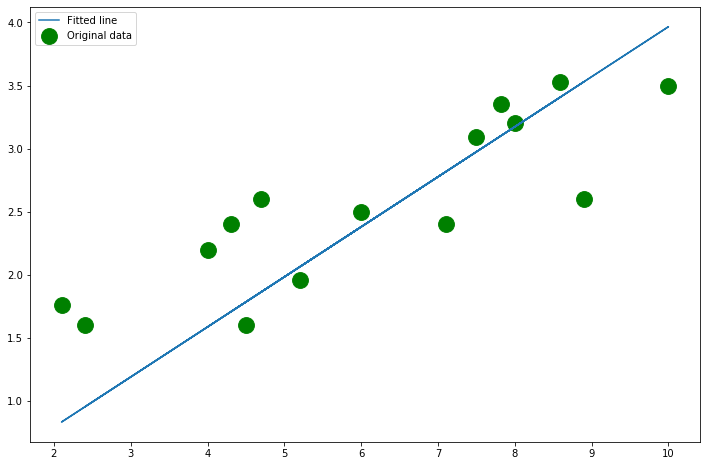

In [137]:
plt.figure(figsize = (12,8))
plt.scatter(x_train,y_train,label = 'Original data', s=250, c='g')
plt.plot(x_train, predicted, label ='Fitted line')
plt.legend()
plt.show()